Current subdirectory: ./audiofiles/01-audio
Current subdirectory: ./audiofiles/02-audio
Current subdirectory: ./audiofiles/03-audio
Current subdirectory: ./audiofiles/04-audio
Current subdirectory: ./audiofiles/05-audio
Current subdirectory: ./audiofiles/06-audio
Current subdirectory: ./audiofiles/07-audio
Current subdirectory: ./audiofiles/08-audio
Current subdirectory: ./audiofiles/09-audio
Current subdirectory: ./audiofiles/10-audio
Current subdirectory: ./audiofiles/11-audio
Current subdirectory: ./audiofiles/12-audio
Current subdirectory: ./audiofiles/13-audio
Current subdirectory: ./audiofiles/14-audio
Current subdirectory: ./audiofiles/15-audio
Current subdirectory: ./audiofiles/16-audio
Current subdirectory: ./audiofiles/17-audio
Current subdirectory: ./audiofiles/18-audio
Current subdirectory: ./audiofiles/20-audio
Current subdirectory: ./audiofiles/21-audio
Current subdirectory: ./audiofiles/22-audio
Current subdirectory: ./audiofiles/23-audio
Current subdirectory: ./audiofil

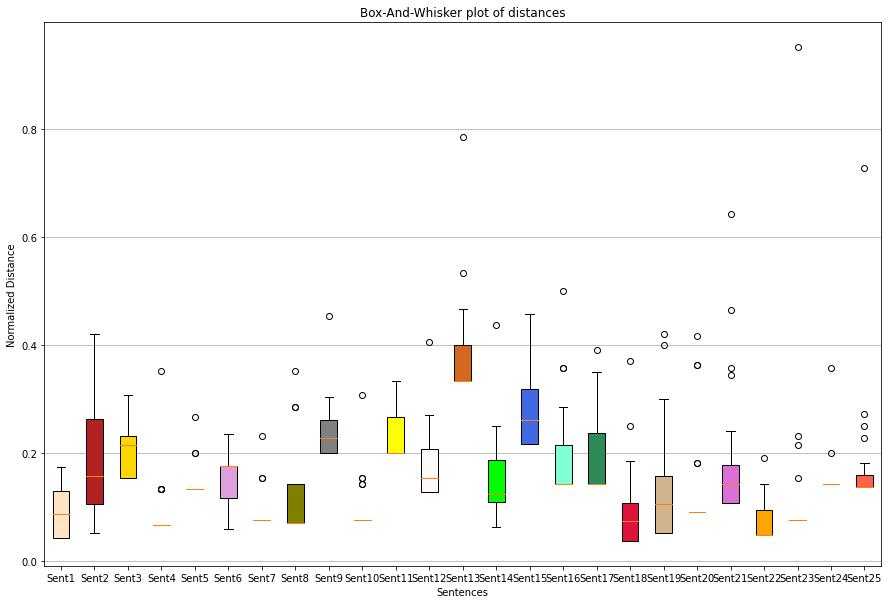

In [2]:
'''
- subdirectories of the root directory cannot have hidden folders (like .ipynb_checkpoints)
- subdirectory group folders cannot contain any file or folder that isn't .wav files

first run these installs before starting the program:
!pip install SpeechRecognition
!pip install Distance
'''
import speech_recognition as sr
import distance as dist
import matplotlib.pyplot as plt
import os
import re

class Speech:
    def __init__(self):
        self.original = []
        self.recognized = []
        self.distances = []

    def read_original(self, inFile):
        orig_file = open(inFile, "r")
        lines = orig_file.read().splitlines()
        for i in range(len(lines)):
            self.original.append(lines[i])
        orig_file.close()

    def conv_audio(self, inDir):
        sentences = sorted(os.listdir(inDir))
        r = sr.Recognizer()
        for i in sentences:
            wav = os.path.join(inDir, i)
            temp = sr.AudioFile(wav)
            with temp as source:
                audio = r.record(source)
                self.recognized.append(r.recognize_google(audio))

    def comp_string(self):
        for i in range(len(self.original)):
            orig_sent = re.sub("[,\.]", " ", self.original[i]).split()
            recg_sent = re.sub("[,\.]", " ", self.recognized[i]).split()
            LD = dist.levenshtein(orig_sent, recg_sent)
            NLD = LD / max(len(orig_sent), len(recg_sent))
            self.distances.append(NLD) # holds all 25 NDLs in 1 list per folder

if __name__ == '__main__':
    speech = Speech()
    speech.read_original("How Speech Recognition Works.txt")
    rootname = './audiofiles'
    all_NDL = []
    for root, subdir, files in os.walk(rootname): 
        for sd in subdir:
            speech.recognized = [] # recognized will reset each run
            speech.distances = [] # distances will reset each run
            speech.conv_audio(root+'/'+sd)
            # COMMENT THIS LINE IF NOT NEEDED TO TEST
            print("Current subdirectory: "+root+'/'+sd) # tracking which subdir it currently is in
            speech.comp_string()
            all_NDL.append(speech.distances) # puts NDL of each group into list

    ordered_all_NDL = []  # sort all_NDL by their sentence order, holds 25 lists, each list index represents sent#, each list is 23 max (max number of groups)
    for j in range(len(all_NDL[0])): # j is sentence #
        sent_n = []
        for i in range(len(all_NDL)): # i is group #
            sent_n.append(all_NDL[i][j])
        ordered_all_NDL.append(sent_n)

    labels = ["Sent"+str(i+1) for i in range(25)]
    colors = ['bisque', 'firebrick', 'gold', 'turquoise', 'teal', \
              'plum', 'yellow', 'olive', 'grey', 'deeppink', \
              'yellow', 'snow', 'chocolate', 'lime', 'royalblue', \
              'aquamarine', 'seagreen', 'crimson', 'tan', 'peru', \
              'orchid', 'orange', 'indigo', 'maroon', 'tomato']
    
    fig, ax1 = plt.subplots(figsize=(15, 10))
    bplot1 = ax1.boxplot(ordered_all_NDL,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
    ax1.set_title('Box-And-Whisker plot of distances')
    
    for patch,color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)  
        
    ax1.yaxis.grid(True)
    ax1.set_xlabel('Sentences')
    ax1.set_ylabel('Normalized Distance')
    
    plt.show()